# **Introdução ao seaborn**

## **Setup** 

Vamos agora conhecer outra biblioteca de dataviz: o seaborn.

Essa biblioteca é construída usando a matplotlib, e tem como foco produzir gráficos estatísticos como por exemplo:

    plots de distribuição
    plots categóricos

Vamos ver exemplos de usabilidade dos tipos de gráficos acima!

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.__version__

'0.11.2'


Plots de distribuição

Como o nome indica, são gráficos que nos auxiliam a visualizar a distribuição dos dados, ou seja, como os dados estão distribuídos nos diferentes valores que determinadas variáveis podem assumir. Aprenderemos mais sobre este conceito na aula de estatística.

Para ilustrar esses gráficos, vamos utilizar alguns datasets que já vêm com o prório seaborn!


In [3]:
sns.get_dataset_names()[:5]

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes']

## **Iris Dataset** 

<center><img src="images/iris.png" align="center" width=400/></center>

</br>

Esta é talvez a base de dados mais conhecida na literatura para reconhecimento de padrões, do inglês *pattern recognition*. Apresentado no artigo de Fisher, é considerado um clássico na área.

O conjunto de dados contém 3 classes de 50 instâncias cada, onde cada classe se refere a um tipo de planta de íris. Vamos checar isso.

In [4]:
# lendo o dataset "tips"
iris = sns.load_dataset("iris")
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [5]:
iris.loc[:, "species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Normalmente quando vamos escolher um gráfico para visualizar nossos dados precisamos saber se é um dado categórico ou númerico. Vamos acessar o atributo ```dtypes``` do DataFrame para checar com o que estamos lidando.

In [6]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

## **Histogramas** 

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

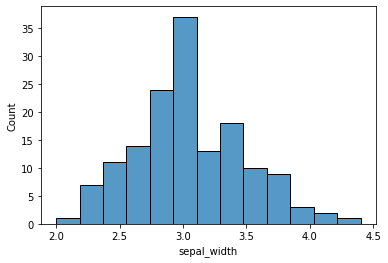

In [7]:
column_name = "sepal_width"
sns.histplot(data=iris, x=column_name)

Esse gráfico mostra a distribuição dos valores dessa coluna. Normalmente, as funções da biblioteca ```seaborn``` tem um parâmetro chamado ```hue``` que recebe uma variável categórica, permitindo ver o plot selecionado para as diferentes categorias.

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

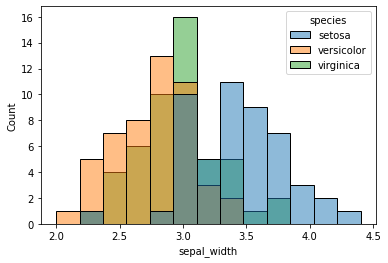

In [8]:
column_name = "sepal_width"
categorical_var = "species"
sns.histplot(data=iris, x=column_name, hue=categorical_var)

Outro parâmetro interessante é o ```kde```, do inglês *kernel density estimation* (Vamos explicar mais dele depois).

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

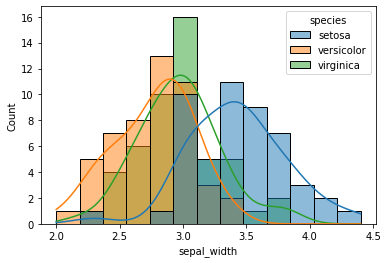

In [9]:
column_name = "sepal_width"
categorical_var = "species"
sns.histplot(data=iris, x=column_name, hue=categorical_var, kde=True)

Além disso, normalmente também podemos especificar, o eixo (gráfico) que vamos colocar. Perceba também, que o método ```histplot``` retorna um eixo (gráfico), permitindo alterar título, label, setar limite, entre outros... conforme vimos na aula passada.

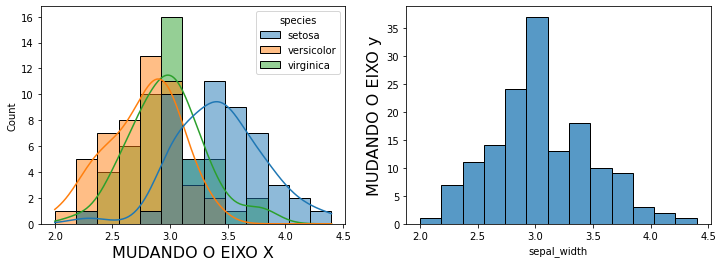

In [10]:
column_name = "sepal_width"
categorical_var = "species"

fig, axs = plt.subplots(1,2,figsize=(12,4))

g1 = sns.histplot(data=iris, x=column_name, hue=categorical_var, ax=axs[0], kde=True)
g2 = sns.histplot(data=iris, x=column_name, ax=axs[1])

g1.set_xlabel("MUDANDO O EIXO X", fontsize=16)
g2.set_ylabel("MUDANDO O EIXO y", fontsize=16)

plt.show()

## **JointPlot** 

Outra coisa que pode ser interessante é entender como duas variáveis numéricas se relacionam. Vamos ver a seguir.

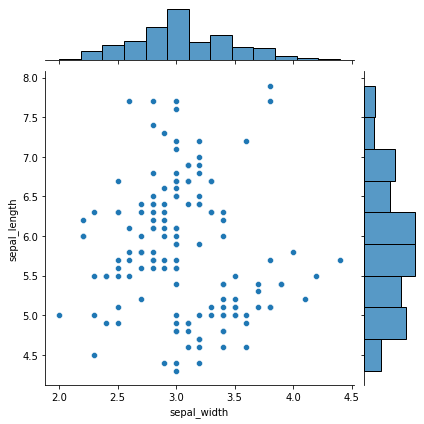

In [11]:
column1_name = "sepal_width"
column2_name = "sepal_length"
categorical_var = "species"


sns.jointplot(x=column1_name, y=column2_name, data=iris)
plt.show()

Assim como o método ```histplot``` também podemos utilizar parâmetros como ```hue```. 

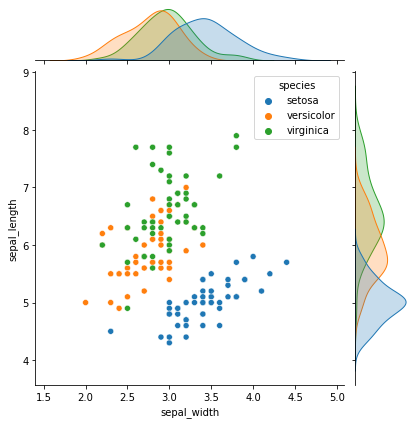

In [12]:
column1_name = "sepal_width"
column2_name = "sepal_length"
categorical_var = "species"

g = sns.jointplot(x=column1_name, y=column2_name, data=iris, hue=categorical_var)
plt.show()

Note que esse método não nos retorna um eixo de matplotlib conforme vimos no item anterior. Por isso é muito importante ver a documentação e entender o que cada objeto pode ou não fazer.

## **Pairplot** 

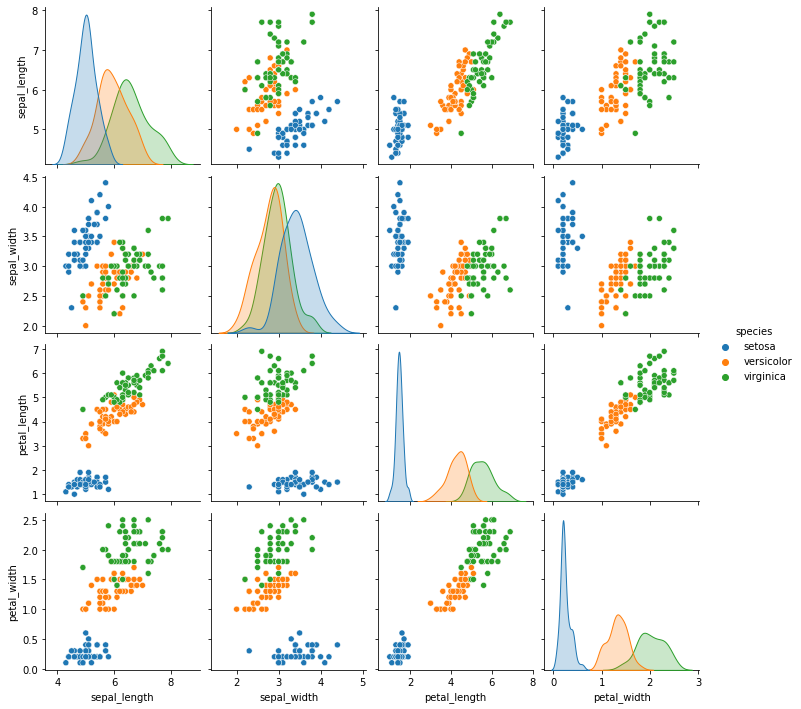

In [13]:
_ = sns.pairplot(iris, hue=categorical_var)

## **Boxplot** 

Outro plot muito usado é o boxplot. Ele é muito interessante quando queremos entender nossos dados, mas não estamos tão interessados na distribuição em si.

<center><img src="images/boxplot.png" align="center" width=400/></center>

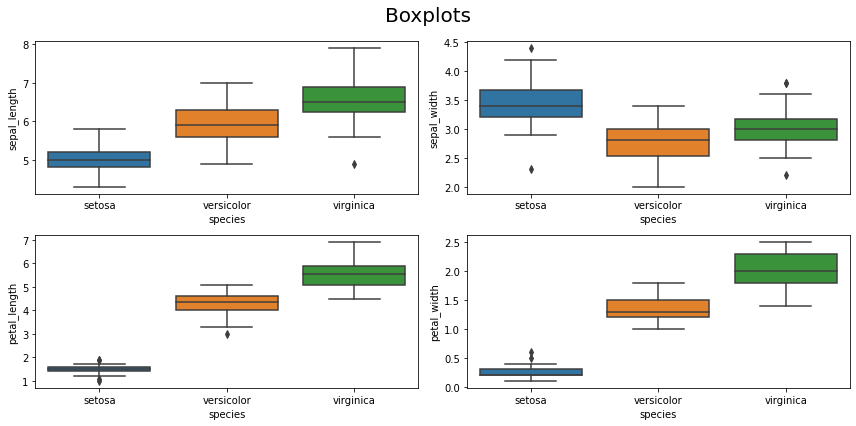

In [14]:
fig, axs = plt.subplots(2,2,figsize=(12,6))

categorical_var = "species"
columns = iris.drop(columns=[categorical_var]).columns

for column, ax in zip(columns, axs.flatten()):
    sns.boxplot(data=iris, x=categorical_var, y=column, ax=ax)
    
plt.suptitle("Boxplots", fontsize=20)
plt.tight_layout()
plt.show()

#### **Boxplot vs Histogramas**

Qual é mais fácil de visualizar e interpretar?

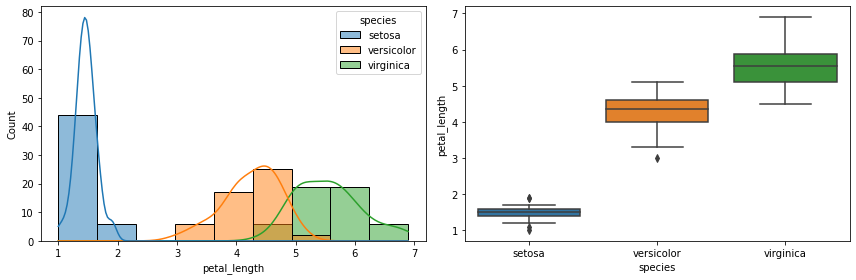

In [15]:
fig, axs = plt.subplots(1,2,figsize=(12,4))

column = "petal_length"
categorical_var = "species"

sns.histplot(data=iris, x=column, kde=True, hue=categorical_var, ax=axs[0])
sns.boxplot(data=iris, x=categorical_var, y=column, ax=axs[1])
    
plt.tight_layout()
plt.show()

Ambos gráficos são importantes, não conhecemos a distribuição e podemos tomar a decisão errada se não olharmos pela maior quantidade possível de formas. 

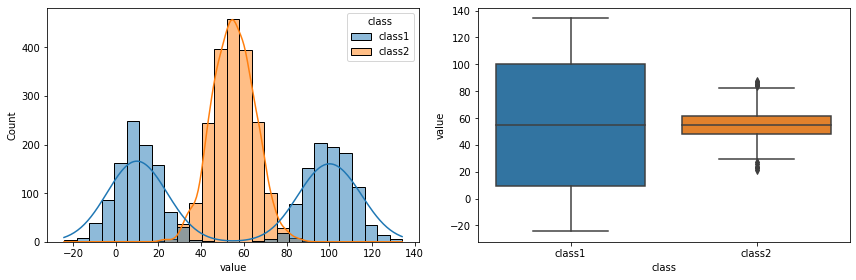

In [16]:
df = pd.read_csv("data/sintetic_boxplot_hist.csv")

fig, axs = plt.subplots(1,2,figsize=(12,4))

column = "value"
categorical_var = "class" 

sns.histplot(data=df, x=column, kde=True, hue=categorical_var, ax=axs[0])
sns.boxplot(data=df, x=categorical_var, y=column, ax=axs[1])
    
plt.tight_layout()
plt.show()

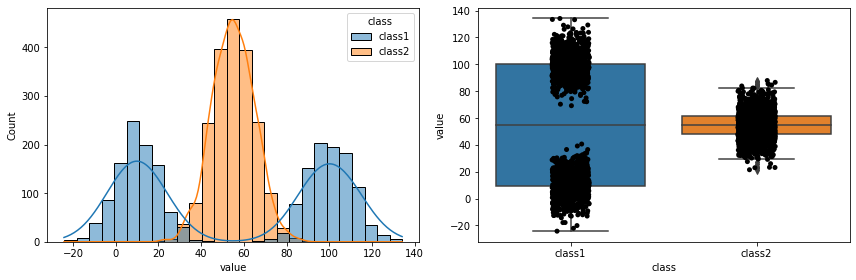

In [17]:
df = pd.read_csv("data/sintetic_boxplot_hist.csv")

fig, axs = plt.subplots(1,2,figsize=(12,4))

column = "value"
categorical_var = "class" 

sns.histplot(data=df, x=column, kde=True, hue=categorical_var, ax=axs[0])
sns.boxplot(data=df, x=categorical_var, y=column, ax=axs[1])
sns.stripplot(data=df, x=categorical_var, y=column, ax=axs[1], color="black")
    
plt.tight_layout()
plt.show()

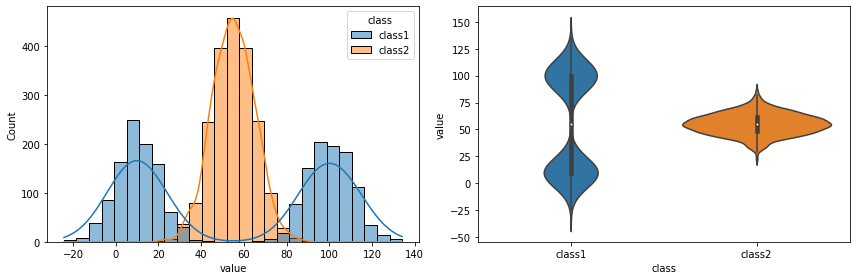

In [18]:
df = pd.read_csv("data/sintetic_boxplot_hist.csv")

fig, axs = plt.subplots(1,2,figsize=(12,4))

column = "value"
categorical_var = "class" 

sns.histplot(data=df, x=column, kde=True, hue=categorical_var, ax=axs[0])
sns.violinplot(data=df, x=categorical_var, y=column, ax=axs[1])
    
plt.tight_layout()
plt.show()

## **Countplot**

Vamos agora começar a olhar para visualizações de variáveis categóricas, para isso vamos utilizar outro dataset.

In [19]:
tips = sns.load_dataset("tips")
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


Esse é um dataframe que contém informações sobre mesas de um restaurante e as gorjetas (tips) que as pessoas da mesa deram, juntamente com outras informações relativas ao pedido.

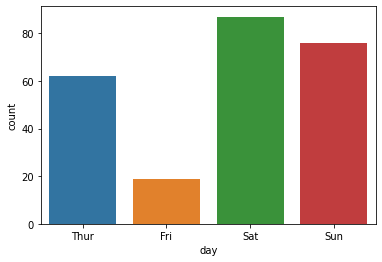

In [20]:
sns.countplot(data = tips, x="day")
plt.show()

Parece um histograma, mas é diferente. Perceba que no eixo x temos uma variável categórica. 

Como dito anteriormente, muito do que aprendemos se aplica nesse caso também.

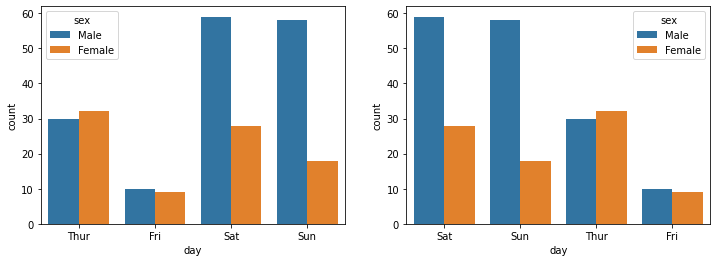

In [21]:
fig, axs = plt.subplots(1,2,figsize=(12,4))

sns.countplot(data = tips, x="day", hue="sex", ax=axs[0])
sns.countplot(data = tips, x="day", hue="sex", order=["Sat", "Sun", "Thur", "Fri"], ax=axs[1])
plt.show()

## **Barplot**

Esse é o gráfico de barras, similar ao countplot, mas com a diferença que no eixo x teremos dados categóricos, e no eixo y algum dado numérico.

O que o barplot mostra é alguma estatística descritiva (média, mediana, etc...) da variável numérica, separada pela variável categórica (como se fosse um "hue")

[]

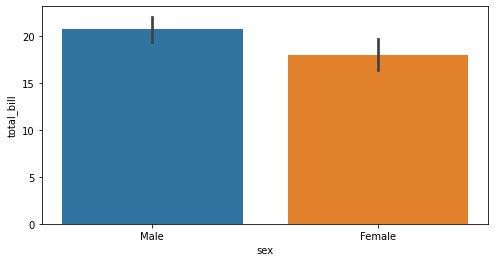

In [22]:
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x=tips['sex'], y=tips['total_bill'], ax=ax)
plt.plot()

Sua vez, selecione um dataset e utilize os métodos vistos em salasns.get_dataset_names()[:5]

In [23]:
sns.get_dataset_names()[:5]

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes']

In [24]:
# Exemplo 'car_crashes'

car = sns.load_dataset("car_crashes")
car.head(3)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
